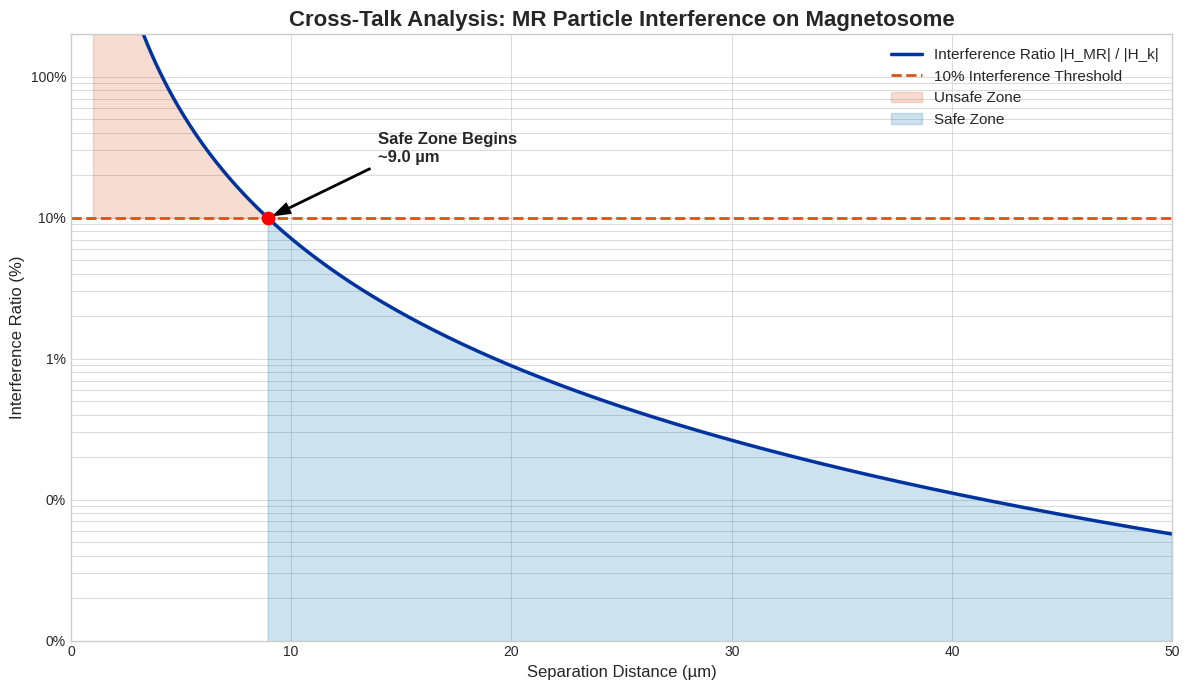

--- Cross-Talk Simulation Results ---
Assumed MR Particle Diameter: 2.0 µm
Assumed Magnetosome Anisotropy Field (H_k): 1.6e+04 A/m
-----------------------------------
✅ The interference from an MR particle drops below the 10% threshold
   at a separation distance of approximately 9.0 µm.

This confirms that the negligible interference constraint is physically realistic,
provided a minimum separation between MR particles and active magnetosome chains is maintained.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# --- 1. Define Physical Constants and Parameters ---
# These values are sourced from the white paper and standard physics.

# Permeability of free space
mu_0 = 4 * np.pi * 1e-7  # (T·m/A)

# MR Particle Properties (Micron-sized Iron Sphere)
mr_particle_diameter = 2e-6  # 2 µm diameter
mr_particle_radius = mr_particle_diameter / 2
mr_particle_volume = (4/3) * np.pi * mr_particle_radius**3
# Saturation magnetization of iron (the MR particle material)
M_s_iron = 1.7e6  # (A/m)
# Magnetic moment of a single MR particle
mu_j = mr_particle_volume * M_s_iron  # (A·m²)

# Magnetosome Properties (Nanometer-sized Magnetite)
# Anisotropy field (H_k) for Fe3O4, a key parameter for stability.
# The white paper cites a range of 15-30 mT. We convert to A/m.
B_k_magnetite = 20e-3  # 20 mT, a typical value in the range
H_k_magnetite = B_k_magnetite / mu_0  # (A/m)

# Define the critical interference threshold
interference_threshold = 0.10  # 10%

# --- 2. Define the Physics Model ---
# This function calculates the magnetic field from the MR particle at a given distance.

def calculate_H_mr(mu_particle, r):
    """
    Calculates the maximum magnitude of the magnetic field from a magnetic dipole.
    This represents the worst-case interference field from an MR particle.

    Args:
        mu_particle (float): Magnetic moment of the source particle (A·m²).
        r (np.array): Array of distances from the particle (m).

    Returns:
        np.array: Magnitude of the magnetic field H (A/m) at each distance.
    """
    # This formula for the maximum field magnitude |H| = (1 / 2π) * (m / r³)
    # occurs along the axis of the dipole.
    return (1 / (2 * np.pi)) * (mu_particle / r**3)

# --- 3. Simulation Execution ---
# We'll calculate the interference ratio over a range of distances.

# Create a range of separation distances from 1 µm to 50 µm
distances_um = np.linspace(1, 50, 500)
distances_m = distances_um * 1e-6

# Calculate the interfering field H_MR at each distance
H_mr_values = calculate_H_mr(mu_j, distances_m)

# Calculate the critical interference ratio |H_MR| / |H_k|
interference_ratio = H_mr_values / H_k_magnetite

# --- 4. Find the "Safe Distance" ---
# Determine the exact distance where the interference drops below the threshold.

# Find the index where the ratio first drops below the threshold
safe_indices = np.where(interference_ratio < interference_threshold)[0]
if safe_indices.size > 0:
    first_safe_index = safe_indices[0]
    safe_distance_um = distances_um[first_safe_index]
    safe_ratio = interference_ratio[first_safe_index]
    found_safe_zone = True
else:
    found_safe_zone = False
    safe_distance_um = -1 # Sentinel value

# --- 5. Visualization ---
# Plot the results to create a clear, intuitive map of the safe operating zone.

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 7), dpi=100)

# Plot the interference ratio curve
ax.plot(distances_um, interference_ratio * 100, label='Interference Ratio |H_MR| / |H_k|', color='#0033A0', lw=2.5)

# Plot the 10% threshold line
ax.axhline(y=interference_threshold * 100, color='#D95319', linestyle='--', lw=2, label=f'{interference_threshold:.0%} Interference Threshold')

# Shade the "Unsafe" and "Safe" operating zones
ax.fill_between(distances_um, interference_ratio * 100, interference_threshold * 100,
                where=interference_ratio >= interference_threshold,
                color='#D95319', alpha=0.2, interpolate=True, label='Unsafe Zone')
ax.fill_between(distances_um, interference_ratio * 100,
                where=interference_ratio < interference_threshold,
                color='#0072B2', alpha=0.2, interpolate=True, label='Safe Zone')

# Annotate the safe distance crossover point
if found_safe_zone:
    ax.scatter(safe_distance_um, safe_ratio * 100, color='red', zorder=5, s=80)
    ax.annotate(f'Safe Zone Begins\n~{safe_distance_um:.1f} µm',
                xy=(safe_distance_um, safe_ratio * 100),
                xytext=(safe_distance_um + 5, 25),
                arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
                fontsize=12, fontweight='bold')

# Formatting the plot
ax.set_title('Cross-Talk Analysis: MR Particle Interference on Magnetosome', fontsize=16, fontweight='bold')
ax.set_xlabel('Separation Distance (µm)', fontsize=12)
ax.set_ylabel('Interference Ratio (%)', fontsize=12)
ax.set_yscale('log')
ax.yaxis.set_major_formatter(mticker.PercentFormatter())
ax.set_xlim(0, 50)
ax.set_ylim(0.01, 200) # Set y-limits for log scale clarity
ax.legend(fontsize=11)
ax.grid(True, which='both', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

# --- 6. Print Summary ---
print("--- Cross-Talk Simulation Results ---")
print(f"Assumed MR Particle Diameter: {mr_particle_diameter*1e6:.1f} µm")
print(f"Assumed Magnetosome Anisotropy Field (H_k): {H_k_magnetite:.1e} A/m")
print("-" * 35)
if found_safe_zone:
    print(f"✅ The interference from an MR particle drops below the {interference_threshold:.0%} threshold")
    print(f"   at a separation distance of approximately {safe_distance_um:.1f} µm.")
    print("\nThis confirms that the negligible interference constraint is physically realistic,")
    print("provided a minimum separation between MR particles and active magnetosome chains is maintained.")
else:
    print("❌ Could not find a safe operating zone within the simulated distance range.")